# Intro problem
 - Given is the dataset Data_3D_2classes.csv. It consists of 3d-vectors with 2 class labels assigned.
 - Learn a simple “deep” network to classify these data using (Keras and) Tensorflow.
Python script to read and view these data: Data_3D_2classes_Read.py.

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

from tensorflow.contrib.keras import models, layers

from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline


## Load data


In [239]:
data_path = '/Users/horczech/Desktop/Dresden VOL.1/Praktikum_ML2/intro_exercise/Data_3D_2classes.csv'
input_data = pd.read_csv(data_path, sep=';', names=['X', 'Y', 'Z', 'label'])

input_data.head()




<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>X</th>
      <th>Y</th>
      <th>Z</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1.433733</td>
      <td>3.320437</td>
      <td>2.636897</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.844232</td>
      <td>2.520782</td>
      <td>1.242298</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3.307627</td>
      <td>3.320330</td>
      <td>1.556914</td>
      <td>-1.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1.806233</td>
      <td>2.887651</td>
      <td>1.744377</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.720881</td>
      <td>1.057774</td>
      <td>1.464512</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>
</div>

## Prepare data

In [240]:
features = input_data.drop('label', axis=1)
labels = input_data['label']
labels = labels.apply(lambda x: 1 if x==1 else 0)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.5)


##Visualize input data 





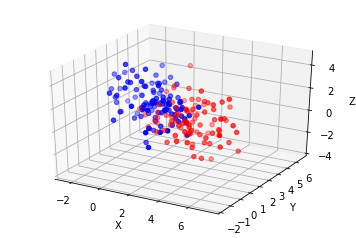

In [241]:
# indexes of rows with class 1
idxs_class_0 = labels.index[labels == 0].tolist()
idxs_class_1 = labels.index[labels == 1].tolist()

features_class_0 = features.iloc[idxs_class_0]
features_class_1 = features.iloc[idxs_class_1]

%matplotlib inline

threedee = plt.figure().gca(projection='3d')
threedee.scatter(features_class_0['X'], features_class_0['Y'], features_class_0['Z'], color='r')
threedee.scatter(features_class_1['X'], features_class_1['Y'], features_class_1['Z'], color='b')

threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')

# uncomment for popup interactive window + remove "inline" above
# plt.show()

## Scale the data

In [242]:
scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

## Create model

In [243]:
dnn_keras_model = models.Sequential()

dnn_keras_model.add(layers.Dense(units=5, input_dim=3, activation='relu', use_bias=True))

dnn_keras_model.add(layers.Dense(units=5, activation='relu'))
dnn_keras_model.add(layers.Dense(units=5, activation='relu'))
dnn_keras_model.add(layers.Dense(units=5, activation='relu'))


dnn_keras_model.add(layers.Dense(units=2, activation='softmax'))


In [244]:
from tensorflow.contrib.keras import optimizers


dnn_keras_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [245]:
dnn_keras_model.fit(scaled_x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100


 10/100 [==>...........................] - ETA: 9s - loss: 0.6745 - acc: 0.8000

100/100 [==============================] - 1s - loss: 0.6723 - acc: 0.7700     


Epoch 2/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.6674 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.6591 - acc: 0.8200     


Epoch 3/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.6546 - acc: 0.7000

100/100 [==============================] - 0s - loss: 0.6443 - acc: 0.8300     


Epoch 4/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.6026 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.6303 - acc: 0.8500     


Epoch 5/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.5980 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.6132 - acc: 0.8400     


Epoch 6/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.5607 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.5951 - acc: 0.8500     


Epoch 7/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.6752 - acc: 0.7000

100/100 [==============================] - 0s - loss: 0.5762 - acc: 0.8500     


Epoch 8/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.5691 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.5568 - acc: 0.8600     


Epoch 9/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.5450 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.5369 - acc: 0.8700     


Epoch 10/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.5686 - acc: 0.7000

100/100 [==============================] - 0s - loss: 0.5168 - acc: 0.8800     


Epoch 11/100


 10/100 [==>...........................] - ETA: 0s - loss: 0.5404 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.4964 - acc: 0.8800     


Epoch 12/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.5706 - acc: 0.7000

100/100 [==============================] - 0s - loss: 0.4777 - acc: 0.8800     


Epoch 13/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.4429 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.4604 - acc: 0.8800     


Epoch 14/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.5621 - acc: 0.7000

100/100 [==============================] - 0s - loss: 0.4423 - acc: 0.8800     


Epoch 15/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.5013 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.4268 - acc: 0.8800     


Epoch 16/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.5969 - acc: 0.7000

100/100 [==============================] - 0s - loss: 0.4118 - acc: 0.8800     


Epoch 17/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.3281 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.3982 - acc: 0.8800     

Epoch 18/100


 10/100 [==>...........................] - ETA: 0s - loss: 0.3435 - acc: 0.9000



100/100 [==============================] - 0s - loss: 0.3847 - acc: 0.8700     


Epoch 19/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2815 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.3726 - acc: 0.8700     


Epoch 20/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.3273 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.3618 - acc: 0.8700     


Epoch 21/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.3138 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.3515 - acc: 0.8800     


Epoch 22/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.3766 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.3418 - acc: 0.8800     


Epoch 23/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.5008 - acc: 0.7000

100/100 [==============================] - 0s - loss: 0.3332 - acc: 0.8800     


Epoch 24/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1934 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.3249 - acc: 0.8800     


Epoch 25/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2953 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.3176 - acc: 0.8700     


Epoch 26/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.3911 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.3100 - acc: 0.8800     


Epoch 27/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2891 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.3041 - acc: 0.8800     


Epoch 28/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2535 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.3034 - acc: 0.8800     


Epoch 29/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2799 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.2899 - acc: 0.8900     


Epoch 30/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.4194 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.2884 - acc: 0.8800     


Epoch 31/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1234 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.2798 - acc: 0.8900     


Epoch 32/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1211 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.2734 - acc: 0.9100     


Epoch 33/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2365 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.2705 - acc: 0.9000     


Epoch 34/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2265 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.2678 - acc: 0.9100     


Epoch 35/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1456 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.2598 - acc: 0.9200     


Epoch 36/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.4241 - acc: 0.7000

100/100 [==============================] - 0s - loss: 0.2537 - acc: 0.9000     


Epoch 37/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.3426 - acc: 0.9000



100/100 [==============================] - 0s - loss: 0.2489 - acc: 0.9000     


Epoch 38/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0615 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.2442 - acc: 0.9000     


Epoch 39/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0858 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.2428 - acc: 0.9200     


Epoch 40/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.3822 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.2350 - acc: 0.9000     


Epoch 41/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1194 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.2307 - acc: 0.9100     


Epoch 42/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1448 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.2262 - acc: 0.9100     


Epoch 43/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.4381 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.2227 - acc: 0.9100     


Epoch 44/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.3133 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.2197 - acc: 0.9000     


Epoch 45/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1563 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.2145 - acc: 0.9200     


Epoch 46/100


 10/100 [==>...........................] - ETA: 0s - loss: 0.1456 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.2134 - acc: 0.9100     


Epoch 47/100


 10/100 [==>...........................] - ETA: 0s - loss: 0.3446 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.2090 - acc: 0.9300     


Epoch 48/100


 10/100 [==>...........................] - ETA: 0s - loss: 0.4211 - acc: 0.7000

100/100 [==============================] - 0s - loss: 0.2043 - acc: 0.9200     


Epoch 49/100


 10/100 [==>...........................] - ETA: 0s - loss: 0.2235 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.2041 - acc: 0.9200     


Epoch 50/100


 10/100 [==>...........................] - ETA: 0s - loss: 0.0719 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1994 - acc: 0.9300     

Epoch 51/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1937 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.1955 - acc: 0.9200     


Epoch 52/100


 10/100 [==>...........................] - ETA: 0s - loss: 0.1127 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1921 - acc: 0.9300     


Epoch 53/100


 10/100 [==>...........................] - ETA: 0s - loss: 0.2469 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.1917 - acc: 0.9200     


Epoch 54/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1751 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.1846 - acc: 0.9200     


Epoch 55/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.3291 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.1859 - acc: 0.9300     


Epoch 56/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.4045 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.1910 - acc: 0.9300     


Epoch 57/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.4620 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.1764 - acc: 0.9300     


Epoch 58/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1718 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.1747 - acc: 0.9300     


Epoch 59/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2220 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.1714 - acc: 0.9400     


Epoch 60/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.3421 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.1684 - acc: 0.9300     


Epoch 61/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1972 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.1669 - acc: 0.9400     


Epoch 62/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0878 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1632 - acc: 0.9400     


Epoch 63/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0221 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1609 - acc: 0.9400     


Epoch 64/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2378 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.1616 - acc: 0.9500     


Epoch 65/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1106 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1554 - acc: 0.9400     


Epoch 66/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0756 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1524 - acc: 0.9400     


Epoch 67/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1685 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.1533 - acc: 0.9400     


Epoch 68/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.3027 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.1463 - acc: 0.9500     


Epoch 69/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0879 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1503 - acc: 0.9500     


Epoch 70/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0899 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1400 - acc: 0.9600     


Epoch 71/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2113 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.1406 - acc: 0.9500     


Epoch 72/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2200 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.1472 - acc: 0.9500     


Epoch 73/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2007 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.1375 - acc: 0.9500     


Epoch 74/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0593 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1332 - acc: 0.9500     


Epoch 75/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0969 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1313 - acc: 0.9500     


Epoch 76/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1398 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1295 - acc: 0.9500     


Epoch 77/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.4340 - acc: 0.7000

100/100 [==============================] - 0s - loss: 0.1263 - acc: 0.9500     


Epoch 78/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1510 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.1280 - acc: 0.9600     


Epoch 79/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0768 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1290 - acc: 0.9500     


Epoch 80/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2205 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.1307 - acc: 0.9500     


Epoch 81/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1352 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1179 - acc: 0.9700     


Epoch 82/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0454 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1209 - acc: 0.9500     


Epoch 83/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2239 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.1156 - acc: 0.9500     


Epoch 84/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.3678 - acc: 0.8000

100/100 [==============================] - 0s - loss: 0.1154 - acc: 0.9700     


Epoch 85/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0731 - acc: 1.0000



100/100 [==============================] - 0s - loss: 0.1136 - acc: 0.9600     


Epoch 86/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1278 - acc: 1.0000



100/100 [==============================] - 0s - loss: 0.1105 - acc: 0.9600     


Epoch 87/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1849 - acc: 0.9000



100/100 [==============================] - 0s - loss: 0.1097 - acc: 0.9500     


Epoch 88/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0539 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1045 - acc: 0.9600     


Epoch 89/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1540 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1015 - acc: 0.9700     


Epoch 90/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0776 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.1003 - acc: 0.9700     


Epoch 91/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1288 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.0981 - acc: 0.9700     


Epoch 92/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.2594 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.0982 - acc: 0.9600     


Epoch 93/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1658 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.1022 - acc: 0.9700     


Epoch 94/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0568 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.0935 - acc: 0.9700     


Epoch 95/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1385 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.0927 - acc: 0.9600     


Epoch 96/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0909 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.0877 - acc: 0.9800     


Epoch 97/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1267 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.0915 - acc: 0.9700     


Epoch 98/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.1833 - acc: 0.9000

100/100 [==============================] - 0s - loss: 0.0935 - acc: 0.9600     


Epoch 99/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0428 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.0874 - acc: 0.9600     


Epoch 100/100
 10/100 [==>...........................] - ETA: 0s - loss: 0.0243 - acc: 1.0000

100/100 [==============================] - 0s - loss: 0.0859 - acc: 0.9700     

#Test the result

In [246]:
predictions = dnn_keras_model.predict_classes(scaled_x_test)

 32/100 [========>.....................] - ETA: 0s

In [247]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96        40
          1       1.00      0.95      0.97        60

avg / total       0.97      0.97      0.97       100

